In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [2]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至最后一列
data = data.iloc[:, 6:]

# 打印数据的前几行
print(data.head()) 

   重量平均值    重量相对偏差  重量标准偏差  重量变异系数  重量最小值  重量最大值  吸阻平均值    吸阻相对偏差  吸阻标准偏差  \
0  0.516  0.006524   0.011   2.202  0.499  0.538  1.275  0.041404   0.048   
1  0.515  0.004573   0.012   2.350  0.482  0.545  1.321  0.006820   0.046   
2  0.507  0.011032   0.012   2.316  0.477  0.524  1.291  0.029375   0.049   
3  0.507  0.011032   0.013   2.549  0.479  0.529  1.296  0.025616   0.059   
4  0.509  0.007131   0.009   1.863  0.486  0.531  1.350  0.014984   0.058   

   吸阻变异系数  ...  嘴通最小值  嘴通最大值  总通平均值  总通标准偏差  总通变异系数  总通最小值  总通最大值     水分  \
0   3.784  ...   33.7   41.4   44.6   2.006   4.502   40.1   48.0  12.08   
1   3.465  ...   31.3   39.6   43.0   2.106   4.904   37.8   47.0  12.12   
2   3.802  ...   30.9   37.4   42.0   1.810   4.308   38.4   45.3  11.86   
3   4.587  ...   31.4   41.4   42.8   2.027   4.739   36.8   47.5  11.64   
4   4.322  ...   33.1   39.9   42.0   1.577   3.751   38.4   45.6  11.63   

    含末率  端部落丝量  
0  3.26    0.7  
1  3.09    0.7  
2  4.32    1.2  
3  3.69    1

In [3]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在的缺失值是-3至-1列，则删除这行数据；如果存在的缺失值是其他列，则用均值填充
        for col in df.columns[-3:]:
            df = df[df[col].notna()]
        df = df.fillna(df.mean())
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

print("数据预处理前的形状:", data.shape)
data = preprocess_data(data)
print("数据预处理后的形状:", data.shape)

数据预处理前的形状: (1237, 43)
异常值已处理。
数据预处理后的形状: (321, 43)


In [4]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
print("原始数据的统计信息:")
print(data.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_data_numpy = scaler.fit_transform(data)
# 为了方便查看，可以将其转换回DataFrame
scaled_data = pd.DataFrame(scaled_data_numpy, columns=data.columns)

print("\n-------------------------------------------------")
print("\n标准化后数据的统计信息:")
print(scaled_data.describe())

原始数据的统计信息:
            重量平均值      重量相对偏差      重量标准偏差      重量变异系数       重量最小值       重量最大值  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean     0.512968    0.007715    0.010581    2.055283    0.490963    0.534660   
std      0.004992    0.005956    0.001506    0.286316    0.007370    0.007447   
min      0.502000    0.000672    0.005000    1.006000    0.466000    0.517000   
25%      0.509000    0.003229    0.010000    1.880000    0.487000    0.529000   
50%      0.513000    0.006524    0.011000    2.057000    0.491000    0.533000   
75%      0.516000    0.010425    0.011000    2.228000    0.495000    0.538000   
max      0.531000    0.035783    0.016000    3.133000    0.518000    0.564000   

            吸阻平均值      吸阻相对偏差      吸阻标准偏差      吸阻变异系数  ...       嘴通最小值  \
count  321.000000  321.000000  321.000000  321.000000  ...  321.000000   
mean     1.334728    0.018218    0.049955    3.740691  ...   34.193065   
std      0.030251    0.014023    0.00

# 聚类分析

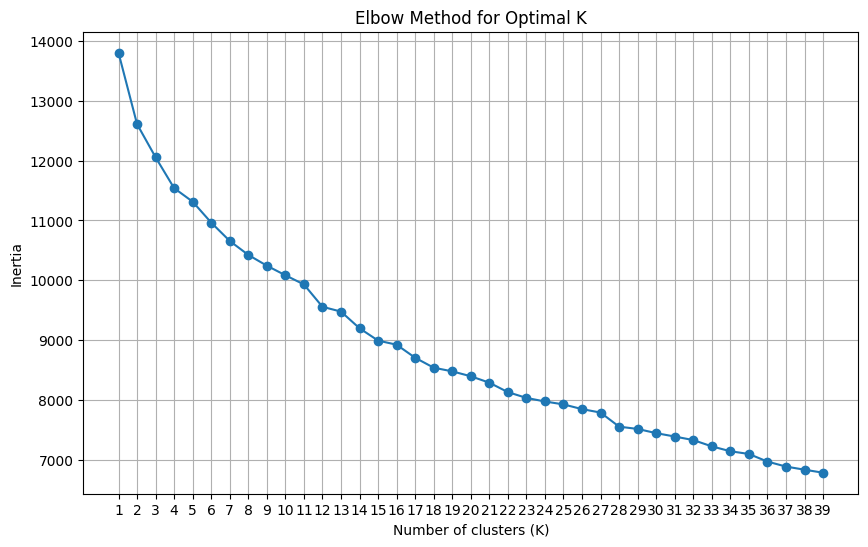

In [5]:
# K-means聚类
from sklearn.cluster import KMeans
# 1. 确定K值（聚类数）
# 使用肘部法则（Elbow Method）来确定K值
inertia = []
N= 40  # 假设我们尝试1到20个聚类
for k in range(1, N):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(range(1, N), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, N))
plt.grid()
plt.show()

In [6]:
# 2. 使用确定的K值进行K-means聚类
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)
# 获取聚类标签
labels = kmeans.labels_
# 将聚类标签添加到原始数据中
data['Cluster'] = labels
# 打印每个聚类的样本数量
print("\n每个聚类的样本数量:")
print(data['Cluster'].value_counts())


每个聚类的样本数量:
Cluster
3    127
1    107
0     44
2     43
Name: count, dtype: int64
